In [1]:
%matplotlib inline

In [2]:
import numpy as np
import os

import dataprovider3 as dp
from dataprovider3 import emio

In [3]:
base_dir = '~/Data_local/datasets/pinky/ground_truth/'
base_dir = os.path.expanduser(base_dir)

data_id = 'stitched_vol40-vol41'

# Input
fname = os.path.join(base_dir, data_id, 'img.h5')
img = emio.imread(fname).astype('float32') / 255.0

# Target
fname = os.path.join(base_dir, data_id, 'seg.h5')
seg = emio.imread(fname)

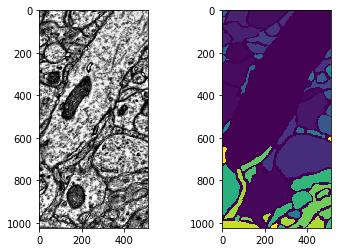

In [4]:
import matplotlib.pyplot as plt

plt.subplot(1,2,1)
plt.imshow(img[1,:,:], cmap='gray')
plt.subplot(1,2,2)
plt.imshow(seg[1,:,:])
plt.show()

In [9]:
# Create dataset.
dataset = dp.Dataset()
dataset.add_data('input', img)
dataset.add_data('segmentation', seg)
w = 256
spec = dict(input=(20,w,w), segmentation=(20,w,w))
dataset.set_spec(spec)

In [10]:
import augmentor as aug

# Augmentor.
track = aug.Track()

In [11]:
import h5py

# Save sample in h5
def save_sample(fname, sample):    
    with h5py.File(fname, 'w') as f:
        for k in sample:
            f.create_dataset(k, data=sample[k])

In [19]:
new_spec = track.prepare(spec, imgs=['input'])
sample = dataset.random_sample(spec=new_spec)
save_sample('sample.h5', sample)
sample = track(sample)
save_sample('sample_track.h5', sample)